##ライブラリのインポート

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pydotplus
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from six import StringIO
from IPython.display import Image

random_state=1234

##irisデータの読み込み

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [26]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


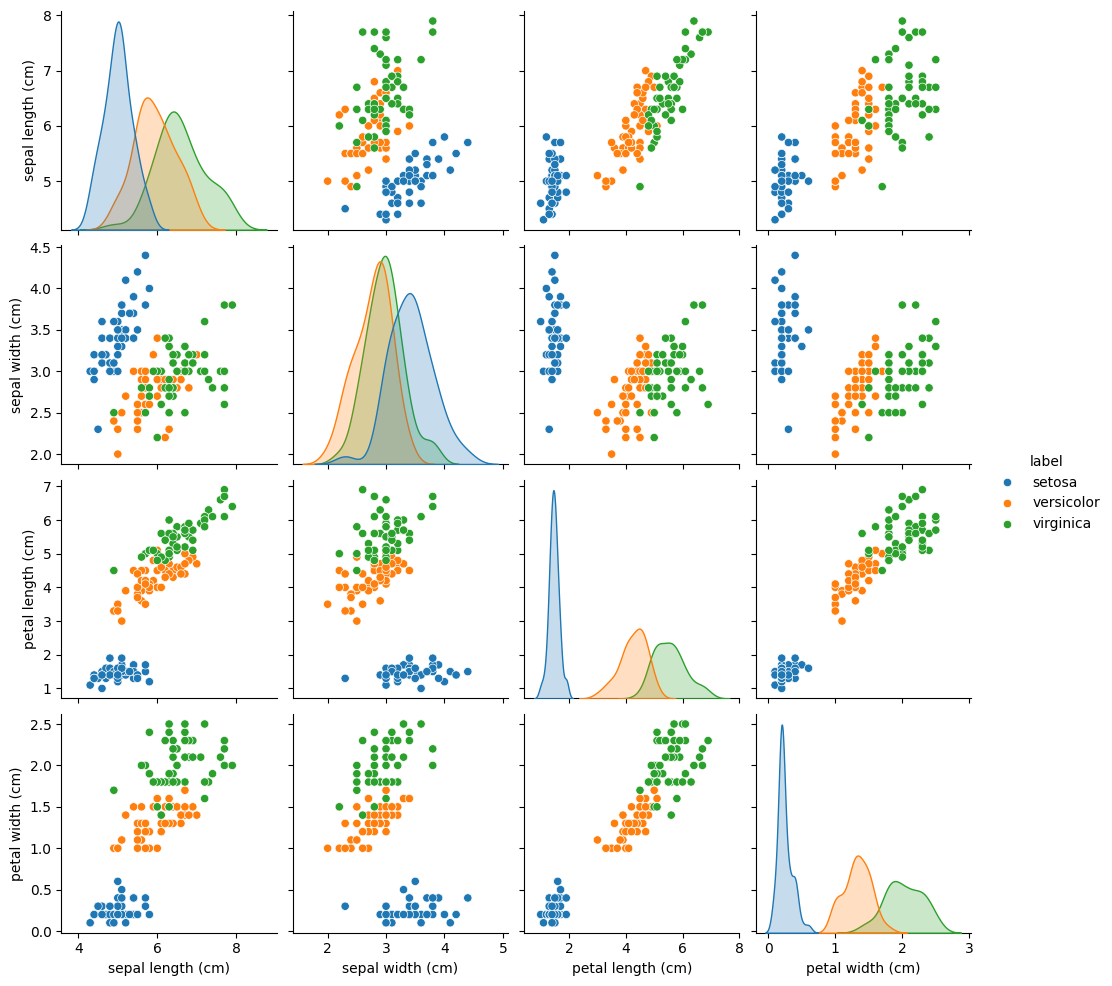

In [27]:
df_iris["label"] = iris.target
df_iris["label"] = df_iris["label"].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
sns.pairplot(df_iris, hue="label")

In [28]:
# 訓練データとテストデータに分割
# X_train, X_test, y_train, y_test = train_test_split(
#         iris['data'], iris['target'],
#         test_size=0.3, random_state=random_state)

In [29]:
X = iris["data"]
y = iris["target"]

##決定木で学習

In [30]:
# クロスバリデーションの分割数
n_split = 5

total_score = 0
split_num = 1

# クロスバリデーション
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=random_state).split(X, y):
  X_train, y_train = X[train_idx], y[train_idx]
  X_test, y_test = X[test_idx], y[test_idx]

  clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=random_state)
  clf = clf.fit(X_train, y_train)

  # 学習データにおけるaccuracy
  train_score = clf.score(X_train, y_train)
  print("train_data" + str(split_num) + ": score=" + str(train_score))

  # テストデータにおけるaccuracy
  test_score = clf.score(X_test, y_test)
  print("test_data" + str(split_num) + ": score=" + str(test_score))

  total_score += test_score
  split_num += 1

# test_scoreの平均値をscoreとする
final_score = total_score / n_split
print("Cross Validation Accuracy = " + str(final_score))

train_data1: score=0.975
test_data1: score=1.0
train_data2: score=0.9833333333333333
test_data2: score=0.9666666666666667
train_data3: score=0.975
test_data3: score=0.9666666666666667
train_data4: score=0.9916666666666667
test_data4: score=0.9
train_data5: score=0.9666666666666667
test_data5: score=1.0
Cross Validation Accuracy = 0.9666666666666668


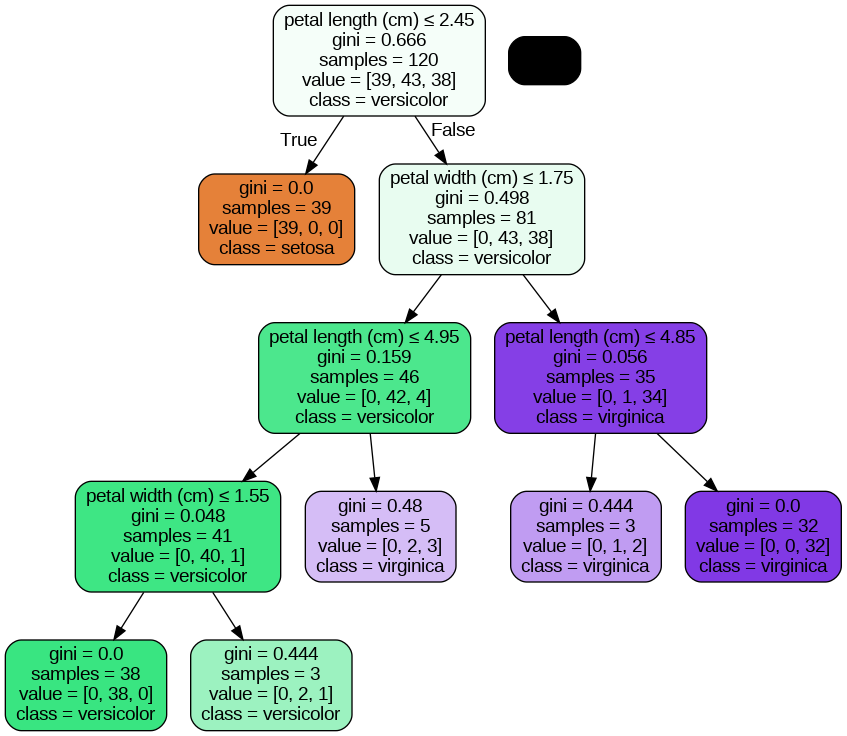

In [31]:
  # 決定木の描画
  dot_data = StringIO() #dotファイル情報の格納先
  export_graphviz(clf, out_file=dot_data,
                      feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True,
                      special_characters=True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  Image(graph.create_png())

##SVMで学習

In [32]:
# クロスバリデーションの分割数
n_split = 5

total_score = 0
split_num = 1

# クロスバリデーション
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=random_state).split(X, y):
  X_train, y_train = X[train_idx], y[train_idx]
  X_test, y_test = X[test_idx], y[test_idx]

  clf = svm.SVC(random_state=random_state)
  clf.fit(X_train, y_train)

  # 学習データにおけるaccuracy
  train_score = clf.score(X_train, y_train)
  print("train_data" + str(split_num) + ": score=" + str(train_score))

  # テストデータにおけるaccuracy
  test_score = clf.score(X_test, y_test)
  print("test_data" + str(split_num) + ": score=" + str(test_score))

  total_score += test_score
  split_num += 1

# test_scoreの平均値をscoreとする
final_score = total_score / n_split
print("Cross Validation Accuracy = " + str(final_score))


train_data1: score=0.9583333333333334
test_data1: score=1.0
train_data2: score=0.975
test_data2: score=0.9666666666666667
train_data3: score=0.9583333333333334
test_data3: score=0.9333333333333333
train_data4: score=0.9666666666666667
test_data4: score=0.9666666666666667
train_data5: score=0.975
test_data5: score=1.0
Cross Validation Accuracy = 0.9733333333333334
